In [ ]:
df = pd.read_csv('master_data - Copy.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
df.head()

In [ ]:
df.rename(columns = {'ts':'time'}, inplace=True)
df.rename(columns = {'id.orig_p':'orig_p'}, inplace=True)
df.rename(columns = {'id.resp_h':'resp_h'}, inplace=True)
df.rename(columns = {'id.resp_p':'resp_p'}, inplace=True)

In [ ]:
df.shape, df.dtypes

## removed unwanted columns

In [ ]:
df.isnull().sum()

In [ ]:
df[df.proto.isnull()]

## Removed null rows

In [ ]:
df.dropna(axis=0, inplace=True)

## No duplicate rows found

In [ ]:
df.duplicated().sum()

0

## Removing null columns

In [ ]:
df.head()

,time,uid,id.orig_h,orig_p,resp_h,resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,device_name
0,time,string,addr,port,addr,port,enum,string,interval,count,count,string,bool,bool,count,string,count,count,count,count,set[string],bml_part1
1,1603299028,Ccb1chs6QYjNuT7mj,192.168.137.249,33542,114.114.114.114,53,udp,dns,0.188474,180,260,SF,-,-,0,Dd,5,320,5,400,-,bml_part1
2,1603299028,CWMBan2VrX4sPc02vg,192.168.137.249,40980,8.8.8.8,53,udp,dns,0.507252,185,265,SF,-,-,0,Dd,5,325,5,405,-,bml_part1
3,1603299025,CD1iTx4BQycLoMMFc,0.0.0.0,68,255.255.255.255,67,udp,dhcp,1.448837,1150,0,S0,-,-,0,D,4,1262,0,0,-,bml_part1
4,1603299025,CFpWR923J1sryGbFGk,192.168.137.249,68,192.168.137.1,67,udp,dhcp,1.439596,259,1208,SF,-,-,0,^dD,1,287,4,1320,-,bml_part1


In [ ]:
df.nunique(), df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3371 entries, 0 to 3370
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time            3371 non-null   object
 1   uid             3371 non-null   object
 2   id.orig_h       3371 non-null   object
 3   orig_p          3371 non-null   object
 4   resp_h          3371 non-null   object
 5   resp_p          3371 non-null   object
 6   proto           3371 non-null   object
 7   service         3371 non-null   object
 8   duration        3371 non-null   object
 9   orig_bytes      3371 non-null   object
 10  resp_bytes      3371 non-null   object
 11  conn_state      3371 non-null   object
 12  local_orig      3371 non-null   object
 13  local_resp      3371 non-null   object
 14  missed_bytes    3371 non-null   object
 15  history         3371 non-null   object
 16  orig_pkts       3371 non-null   object
 17  orig_ip_bytes   3371 non-null   object
 18  resp_pkt

(time              1958
 uid               3371
 id.orig_h           59
 orig_p            2298
 resp_h             265
 resp_p              72
 proto                4
 service              7
 duration          3130
 orig_bytes         443
 resp_bytes         305
 conn_state          11
 local_orig           2
 local_resp           2
 missed_bytes         2
 history             94
 orig_pkts          273
 orig_ip_bytes      564
 resp_pkts          249
 resp_ip_bytes      486
 tunnel_parents       2
 device_name          6
 dtype: int64,
 None)

In [ ]:
df.local_orig.value_counts()

-       3370
bool       1
Name: local_orig, dtype: int64

In [ ]:
df.drop(columns='local_orig', axis=1, inplace=True)

In [ ]:
df.drop(columns='uid', axis=1, inplace=True)

In [ ]:
df.drop(columns='duration', axis=1, inplace=True)

In [ ]:
df.columns

Index(['time', 'id.orig_h', 'orig_p', 'resp_h', 'resp_p', 'proto', 'service',
       'orig_bytes', 'resp_bytes', 'conn_state', 'local_resp', 'missed_bytes',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'device_name'],
      dtype='object')

In [ ]:
df.tunnel_parents.value_counts()

-              3370
set[string]       1
Name: tunnel_parents, dtype: int64

In [ ]:
df.drop(columns='tunnel_parents', axis=1, inplace=True)

In [ ]:
df.missed_bytes.value_counts()

0        3370
count       1
Name: missed_bytes, dtype: int64

In [ ]:
df.drop(columns='missed_bytes', axis=1, inplace=True)

In [ ]:
df.local_resp.value_counts()

-       3370
bool       1
Name: local_resp, dtype: int64

In [ ]:
df.drop(columns='local_resp', axis=1, inplace=True)

In [ ]:
df.drop([0],axis = 0, inplace=True)

## Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['device_name', 'time'], axis=1)

In [ ]:
Y = df[['device_name', 'time']]

In [ ]:
Y

,device_name,time
1,bml_part1,1603299028
2,bml_part1,1603299028
3,bml_part1,1603299025
4,bml_part1,1603299025
5,bml_part1,1603299029
...,...,...
3366,TP-Link_MS110,1620378467
3367,TP-Link_MS110,1620378467
3368,TP-Link_MS110,1620382069
3369,TP-Link_MS110,1620382070


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=0, shuffle=True)

NameError: ignored

In [ ]:
x_train.shape, x_test.shape

((2359, 14), (1011, 14))

# encoding

# device_name

In [ ]:
y_train['device_name'].value_counts()

TP-Link_MS110                    886
tplink_bulb                      834
bml_part3                        216
bml_part1                        194
NETATMO smart radiator valves    157
bml_part2                         72
Name: device_name, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
device_name_enc = LabelEncoder()
device_name_enc.fit(y_train['device_name'])
y_train['device_name_enc'] = device_name_enc.transform(y_train['device_name'])
y_test['device_name_enc'] = device_name_enc.transform(y_test['device_name'])

In [ ]:
y_train[['device_name', 'device_name_enc']].value_counts()

device_name                    device_name_enc
TP-Link_MS110                  1                  886
tplink_bulb                    5                  834
bml_part3                      4                  216
bml_part1                      2                  194
NETATMO smart radiator valves  0                  157
bml_part2                      3                   72
dtype: int64

In [ ]:
y_train.drop(['device_name', 'time'], axis=1, inplace=True)
y_test.drop(['device_name', 'time'], axis=1, inplace=True)

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 3370 to 2733
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   device_name_enc  2359 non-null   int32
dtypes: int32(1)
memory usage: 27.6 KB


In [ ]:
x_train.info(), x_train.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 3370 to 2733
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id.orig_h      2359 non-null   object
 1   orig_p         2359 non-null   object
 2   resp_h         2359 non-null   object
 3   resp_p         2359 non-null   object
 4   proto          2359 non-null   object
 5   service        2359 non-null   object
 6   orig_bytes     2359 non-null   object
 7   resp_bytes     2359 non-null   object
 8   conn_state     2359 non-null   object
 9   history        2359 non-null   object
 10  orig_pkts      2359 non-null   object
 11  orig_ip_bytes  2359 non-null   object
 12  resp_pkts      2359 non-null   object
 13  resp_ip_bytes  2359 non-null   object
dtypes: object(14)
memory usage: 276.4+ KB


(None,
 id.orig_h          57
 orig_p           1641
 resp_h            227
 resp_p             65
 proto               3
 service             6
 orig_bytes        335
 resp_bytes        230
 conn_state         10
 history            68
 orig_pkts         217
 orig_ip_bytes     423
 resp_pkts         195
 resp_ip_bytes     361
 dtype: int64)

In [ ]:
#function to drop columns across train and test set
def del_or_col(col, train = x_train, test = x_test):
    train.drop(col, inplace = True, axis=1)
    test.drop(col, inplace = True, axis=1)
    return train, test

In [ ]:
x_train.head()

,id.orig_h,orig_p,resp_h,resp_p,proto,service,orig_bytes,resp_bytes,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
3370,192.168.137.19,50795,54.247.135.208,443,tcp,ssl,17520,17748,S1,ShADadTttT,543,46656,315,35742
2978,192.168.137.198,36414,129.250.35.250,123,udp,ntp,48,48,SF,Dd,1,76,1,76
3345,192.168.137.19,60016,18.233.32.113,443,tcp,ssl,1231,6837,SF,ShADadFf,14,1967,10,7365
620,192.168.137.229,37223,185.171.123.30,51748,tcp,-,103228,60,SF,ShADadFf,177,112440,161,8440
1885,192.168.137.66,15932,192.168.137.1,53,udp,dns,30,94,SF,Dd,1,58,1,122


In [ ]:
from sklearn.preprocessing import LabelEncoder

## id.orig_h

In [ ]:
cond = x_train['id.orig_h'].value_counts()
threshold = 10
x_train['id.orig_h'] = np.where(x_train['id.orig_h'].isin(cond.index[cond >= threshold ]), x_train['id.orig_h'], 'others')


cond = x_test['id.orig_h'].value_counts()
threshold = 10
x_test['id.orig_h'] = np.where(x_test['id.orig_h'].isin(cond.index[cond >= threshold ]), x_test['id.orig_h'], 'others')

NameError: ignored

In [ ]:
orig_h_enc = LabelEncoder()
orig_h_enc.fit(x_train['id.orig_h'])
x_train['orig_h_enc'] = orig_h_enc.transform(x_train['id.orig_h'])
x_test['orig_h_enc'] = orig_h_enc.transform(x_test['id.orig_h'])

In [ ]:
x_train[['id.orig_h', 'orig_h_enc']].value_counts()

In [ ]:
x_train, x_test = del_or_col(['id.orig_h'])

## id.orig_p

In [ ]:
cond = x_train['orig_p'].value_counts()
threshold = 9
x_train['orig_p'] = np.where(x_train['orig_p'].isin(cond.index[cond >= threshold ]), x_train['orig_p'], 'others')


cond = x_test['orig_p'].value_counts()
threshold = 9
x_test['orig_p'] = np.where(x_test['orig_p'].isin(cond.index[cond >= threshold ]), x_test['orig_p'], 'others')

In [ ]:
orig_p_enc = LabelEncoder()
orig_p_enc.fit(x_train['orig_p'])
x_train['orig_p_enc'] = orig_p_enc.transform(x_train['orig_p'])
x_test['orig_p_enc'] = orig_p_enc.transform(x_test['orig_p'])

In [ ]:
x_train[['orig_p', 'orig_p_enc']].value_counts()

orig_p  orig_p_enc
others  13            1668
51880   5              262
1490    3              225
68      11              53
5353    6               32
131     0               28
3       4               21
59172   8               12
59171   7               11
64791   9               11
133     1                9
137     2                9
64792   10               9
8000    12               9
dtype: int64

In [ ]:
x_train, x_test = del_or_col(['orig_p'])

## resp_h

In [ ]:
cond = x_train['resp_h'].value_counts()
threshold = 9
x_train['resp_h'] = np.where(x_train['resp_h'].isin(cond.index[cond >= threshold ]), x_train['resp_h'], 'others')


cond = x_test['resp_h'].value_counts()
threshold = 9
x_test['resp_h'] = np.where(x_test['resp_h'].isin(cond.index[cond >= threshold ]), x_test['resp_h'], 'others')

In [ ]:
resp_h_enc = LabelEncoder()
resp_h_enc.fit(x_train['resp_h'])
x_train['resp_h_enc'] = resp_h_enc.transform(x_train['resp_h'])
x_test['resp_h_enc'] = resp_h_enc.transform(x_test['resp_h'])

In [ ]:
x_train[['resp_h', 'resp_h_enc']].value_counts()

resp_h             resp_h_enc
192.168.137.1      11            1035
others             42             421
185.171.123.30     10              58
162.159.200.1      6               56
49.51.193.116      29              46
150.109.20.137     5               45
139.155.75.121     3               44
3.232.235.243      23              44
162.159.200.123    7               43
195.113.20.2       14              42
ff02::fb           41              30
49.51.172.162      28              29
23.20.252.213      19              27
239.255.255.250    20              26
10.50.1.7          0               24
255.255.255.255    21              24
77.48.148.7        34              22
ff02::c            40              22
199.195.254.4      15              22
52.6.157.174       31              19
52.45.56.20        30              19
192.168.137.206    12              19
34.197.7.30        24              18
224.0.0.251        18              16
3.211.75.67        22              15
125.212.217.167    2

In [ ]:
x_train, x_test = del_or_col(['resp_h'])

## resp_p

In [ ]:
x_train['resp_p'].value_counts()

53       1008
123       477
443       215
51748     119
8000      113
8001       57
67         53
3702       44
5353       32
51880      31
130        28
3          21
25050      14
80          9
134         9
137         9
52048       8
51747       6
5355        6
51700       5
52556       5
51109       5
44908       4
6025        4
1900        4
47100       3
52402       3
40042       3
2334        3
53377       3
50042       3
42412       3
12520       3
53800       3
52777       3
56613       3
10587       3
50443       2
13299       2
33599       2
3576        2
52959       2
36419       2
53399       2
56097       2
4387        2
53138       1
53805       1
14808       1
136         1
59564       1
39757       1
10523       1
63158       1
56332       1
60443       1
58820       1
53600       1
57796       1
51970       1
53022       1
40052       1
52931       1
11290       1
65392       1
Name: resp_p, dtype: int64

In [ ]:
cond = x_train['resp_p'].value_counts()
threshold = 9
x_train['resp_p'] = np.where(x_train['resp_p'].isin(cond.index[cond >= threshold ]), x_train['resp_p'], 'others')


cond = x_test['resp_p'].value_counts()
threshold = 9
x_test['resp_p'] = np.where(x_test['resp_p'].isin(cond.index[cond >= threshold ]), x_test['resp_p'], 'others')

In [ ]:
resp_p_enc = LabelEncoder()
resp_p_enc.fit(x_train['resp_p'])
x_train['resp_p_enc'] = resp_p_enc.transform(x_train['resp_p'])
x_test['resp_p_enc'] = resp_p_enc.transform(x_test['resp_p'])

In [ ]:
x_train[['resp_p', 'resp_p_enc']].value_counts()

resp_p  resp_p_enc
53      10            1008
123     0              477
443     7              215
others  16             120
51748   8              119
8000    14             113
8001    15              57
67      12              53
3702    6               44
5353    11              32
51880   9               31
130     1               28
3       5               21
25050   4               14
137     3                9
134     2                9
80      13               9
dtype: int64

In [ ]:
x_train, x_test = del_or_col(['resp_p'])

## proto

In [ ]:
proto_enc = LabelEncoder()
proto_enc.fit(x_train['proto'])
x_train['proto_enc'] = proto_enc.transform(x_train['proto'])
x_test['proto_enc'] = proto_enc.transform(x_test['proto'])

In [ ]:
x_train[['proto', 'proto_enc']].value_counts()

proto  proto_enc
udp    2            1914
tcp    1             386
icmp   0              59
dtype: int64

In [ ]:
x_train, x_test = del_or_col(['proto'])

## service

In [ ]:
x_train['service'].value_counts()

dns     1055
-        571
ntp      477
ssl      202
dhcp      53
http       1
Name: service, dtype: int64

In [ ]:
service_enc = LabelEncoder()
service_enc.fit(x_train['service'])
x_train['service_enc'] = service_enc.transform(x_train['service'])
x_test['service_enc'] = service_enc.transform(x_test['service'])

In [ ]:
x_train[['service', 'service_enc']].value_counts()

service  service_enc
dns      2              1055
-        0               571
ntp      4               477
ssl      5               202
dhcp     1                53
http     3                 1
dtype: int64

In [ ]:
x_train, x_test = del_or_col(['service'])

## orig_bytes

In [ ]:
x_test['orig_bytes'].value_counts()

48         196
33         116
31          99
30          85
39          60
-           49
4592        40
1232        25
1231        16
0           13
576         13
544         11
81060       11
44          10
40           9
32           8
38           6
851          6
1236         6
72           5
1247         5
827          5
848          4
850          4
608          4
616          4
62           3
1096         3
548          3
112          3
1248         3
144          3
684          3
640          3
1235         3
464          3
224          3
2258         2
448          2
1400         2
76           2
183          2
1720         2
108          2
24           2
1432         2
96           2
1099         2
150          2
216          2
228          2
4            2
829          2
1260         2
182          2
3668         2
11292        1
148          1
10718        1
11705        1
898          1
22572        1
2443872      1
162120       1
1834         1
545764       1
136312    

In [ ]:
cond = x_train['orig_bytes'].value_counts()
threshold = 6
x_train['orig_bytes'] = np.where(x_train['orig_bytes'].isin(cond.index[cond >= threshold ]), x_train['orig_bytes'], 'others')


cond = x_test['orig_bytes'].value_counts()
threshold = 6
x_test['orig_bytes'] = np.where(x_test['orig_bytes'].isin(cond.index[cond >= threshold ]), x_test['orig_bytes'], 'others')


In [ ]:
orig_bytes_enc = LabelEncoder()
orig_bytes_enc.fit(x_train['orig_bytes'])
x_train['orig_bytes_enc'] = orig_bytes_enc.transform(x_train['orig_bytes'])
x_test['orig_bytes_enc'] = orig_bytes_enc.transform(x_test['orig_bytes'])

In [ ]:
x_train[['orig_bytes', 'orig_bytes_enc']].value_counts()

orig_bytes  orig_bytes_enc
48          23                470
others      34                404
33          15                256
30          12                235
31          13                223
39          18                196
-           0                 154
4592        22                 44
1231        4                  37
0           1                  29
81060       27                 29
1232        5                  27
576         25                 24
40          19                 17
1247        8                  17
828         28                 16
544         24                 16
32          14                 15
1248        9                  12
608         26                 11
38          17                 11
112         3                  11
851         32                 10
1235        6                  10
36          16                 10
829         29                  9
150         10                  9
96          33                  9
1236        7        

In [ ]:
x_train, x_test = del_or_col(['orig_bytes'])

## resp_bytes

In [ ]:
x_train['resp_bytes'].value_counts()

48        474
97        252
0         250
94        237
70        223
119       191
-         154
60         40
32         31
6837       25
604        25
6838       23
672        22
6839       18
194        16
6854       15
640        15
105        11
36         10
608         8
704         8
6853        8
6896        7
6873        6
6895        6
6866        6
8           5
5953        5
6874        5
6843        5
6905        5
87          5
6897        5
5974        4
6876        4
124         4
6875        4
544         3
6906        3
6872        3
6842        3
6844        3
736         3
1208        3
7000        2
312         2
272         2
800         2
822         2
12905       2
816         2
1658        2
864         2
2831        2
6855        2
503         2
576         2
6057        2
6841        2
188         2
372         2
1250        2
108         2
3394        2
279630      1
187         1
4956        1
485712      1
192962      1
96580       1
239130      1
673   

In [ ]:
cond = x_train['resp_bytes'].value_counts()
threshold = 4
x_train['resp_bytes'] = np.where(x_train['resp_bytes'].isin(cond.index[cond >= threshold ]), x_train['resp_bytes'], 'others')


cond = x_test['resp_bytes'].value_counts()
threshold = 9
x_test['resp_bytes'] = np.where(x_test['resp_bytes'].isin(cond.index[cond >= threshold ]), x_test['resp_bytes'], 'others')

In [ ]:
resp_bytes_enc = LabelEncoder()
resp_bytes_enc.fit(x_train['resp_bytes'])
x_train['resp_bytes_enc'] = resp_bytes_enc.transform(x_train['resp_bytes'])
x_test['resp_bytes_enc'] = resp_bytes_enc.transform(x_test['resp_bytes'])

In [ ]:
x_train[['resp_bytes', 'resp_bytes_enc']].value_counts()

resp_bytes  resp_bytes_enc
48          8                 474
97          36                252
0           1                 250
94          35                237
others      37                227
70          31                223
119         3                 191
-           0                 154
60          11                 40
32          6                  31
6837        16                 25
604         12                 25
6838        17                 23
672         15                 22
6839        18                 18
194         5                  16
640         14                 15
6854        21                 15
105         2                  11
36          7                  10
6853        20                  8
704         32                  8
608         13                  8
6896        28                  7
6895        27                  6
6873        23                  6
6866        22                  6
6874        24                  5
6897        29       

In [ ]:
x_train, x_test = del_or_col(['resp_bytes'])

## conn_state

In [ ]:
x_train['conn_state'].value_counts()

SF       1862
S0        342
OTH        76
RSTO       26
SHR        26
S1         19
SH          3
S3          2
RSTRH       2
RSTR        1
Name: conn_state, dtype: int64

In [ ]:
conn_state_enc = LabelEncoder()
conn_state_enc.fit(x_train['conn_state'])
x_train['conn_state_enc'] = conn_state_enc.transform(x_train['conn_state'])
x_test['conn_state_enc'] = conn_state_enc.transform(x_test['conn_state'])

In [ ]:
x_train[['conn_state', 'conn_state_enc']].value_counts()

conn_state  conn_state_enc
SF          7                 1862
S0          4                  342
OTH         0                   76
RSTO        1                   26
SHR         9                   26
S1          5                   19
SH          8                    3
RSTRH       3                    2
S3          6                    2
RSTR        2                    1
dtype: int64

In [ ]:
x_train, x_test = del_or_col(['conn_state'])

## history

In [ ]:
x_train['history'].value_counts()

Dd               1552
D                 335
ShADadFf          176
-                  59
ShADadtFf          35
ShADadTFf          27
^d                 25
ShADadTTFf         20
ShADadR            16
ShADadFRfR         10
S                   8
ShADadtFfR          6
ShAdDa              5
ShADadTt            4
ShADadTtFRfR        4
ShADadFfRR          4
ShADadtFRfR         4
ShAdDaR             4
ShADadtTFRfR        3
ShADTadTFf          3
ShADad              3
^dD                 3
ShADadtTFfR         2
DadA                2
DadATt              2
ShAdDat             2
DdAaTt              2
ShADadFTf           2
AadDr               2
DadATttTt           1
ShADadtWFf          1
ShAdDtTafFr         1
ShADadTtFR          1
ShADadtR            1
ShADTadtFR          1
ShADadTFTfr         1
ShADdtaTFR          1
ShADTFf             1
^ft                 1
ShADadtWTtT         1
F                   1
^dADatT             1
ShADadTtFf          1
DTadtATtTt          1
AadD                1
ShADadtTTR

In [ ]:
cond = x_train['history'].value_counts()
threshold = 8
x_train['history'] = np.where(x_train['history'].isin(cond.index[cond >= threshold ]), x_train['history'], 'others')


cond = x_test['history'].value_counts()
threshold = 8
x_test['history'] = np.where(x_test['history'].isin(cond.index[cond >= threshold ]), x_test['history'], 'others')


In [ ]:
history_enc = LabelEncoder()
history_enc.fit(x_train['history'])
x_train['history_enc'] = history_enc.transform(x_train['history'])
x_test['history_enc'] = history_enc.transform(x_test['history'])

In [ ]:
x_train[['history', 'history_enc']].value_counts()

history     history_enc
Dd          2              1552
D           1               335
ShADadFf    5               176
others      11               96
-           0                59
ShADadtFf   9                35
ShADadTFf   7                27
^d          10               25
ShADadTTFf  8                20
ShADadR     6                16
ShADadFRfR  4                10
S           3                 8
dtype: int64

In [ ]:
x_train, x_test = del_or_col(['history'])

## orig_pkts

In [ ]:
x_train['orig_pkts'].value_counts()

1       1582
14       108
2         63
7         51
15        34
3         34
16        32
90        29
0         26
4         26
10        18
6         15
39        12
40         9
9          8
12         8
17         8
8          6
42         6
180        6
41         6
13         5
43         5
38         5
37         5
135        4
5          4
45         4
33         4
46         4
34         3
36         3
450        3
248        3
44         3
21         3
145        3
11         3
270        3
341        3
18         3
360        3
229        2
54         2
53         2
412        2
424        2
75         2
67         2
172        2
59         2
58         2
28         2
55         2
20         2
468        2
26         2
120        2
177        2
100        2
62         2
108        2
19         2
56         1
458        1
156        1
116        1
1495       1
193        1
150        1
228        1
914        1
344        1
183        1
317        1
122        1
224        1

In [ ]:
cond = x_train['orig_pkts'].value_counts()
threshold = 10
x_train['orig_pkts'] = np.where(x_train['orig_pkts'].isin(cond.index[cond >= threshold ]), x_train['orig_pkts'], 'others')


cond = x_test['orig_pkts'].value_counts()
threshold = 10
x_test['orig_pkts'] = np.where(x_test['orig_pkts'].isin(cond.index[cond >= threshold ]), x_test['orig_pkts'], 'others')


In [ ]:
orig_pkts_enc = LabelEncoder()
orig_pkts_enc.fit(x_train['orig_pkts'])
x_train['orig_pkts_enc'] = orig_pkts_enc.transform(x_train['orig_pkts'])
x_test['orig_pkts_enc'] = orig_pkts_enc.transform(x_test['orig_pkts'])

In [ ]:
x_train[['orig_pkts', 'orig_pkts_enc']].value_counts()

orig_pkts  orig_pkts_enc
1          1                1582
others     13                329
14         3                 108
2          6                  63
7          11                 51
15         4                  34
3          7                  34
16         5                  32
90         12                 29
0          0                  26
4          9                  26
10         2                  18
6          10                 15
39         8                  12
dtype: int64

In [ ]:
x_train, x_test = del_or_col(['orig_pkts'])

## orig_ip_bytes

In [ ]:
x_train['orig_ip_bytes'].value_counts()

76         480
61         256
58         235
59         223
67         196
64          71
68          67
1967        34
83580       29
0           26
1968        24
4788        22
4928        22
144         13
72          12
1983        11
66          11
1984        10
234          9
152          9
1152         8
1971         8
1972         7
1472         7
1495         7
904          7
2030         6
224          6
167160       6
168          5
336          5
2612         5
52           5
304          5
1494         5
392          5
140          4
1578         4
116          4
784          4
192          4
60           4
796          4
1969         4
1473         4
1432         4
128          3
2580         3
2658         3
1995         3
576          3
628          3
452          3
2862         3
1512         3
2476         3
2716         3
1455         3
1931         3
2664         3
1433         3
156          3
672          3
417900       3
5012         3
334320       3
288       

In [ ]:
cond = x_train['orig_ip_bytes'].value_counts()
threshold = 6
x_train['orig_ip_bytes'] = np.where(x_train['orig_ip_bytes'].isin(cond.index[cond >= threshold ]), x_train['orig_ip_bytes'], 'others')


cond = x_test['orig_ip_bytes'].value_counts()
threshold = 6
x_test['orig_ip_bytes'] = np.where(x_test['orig_ip_bytes'].isin(cond.index[cond >= threshold ]), x_test['orig_ip_bytes'], 'others')


In [ ]:
orig_ip_bytes_enc = LabelEncoder()
orig_ip_bytes_enc.fit(x_train['orig_ip_bytes'])
x_train['orig_ip_bytes_enc'] = orig_ip_bytes_enc.transform(x_train['orig_ip_bytes'])
x_test['orig_ip_bytes_enc'] = orig_ip_bytes_enc.transform(x_test['orig_ip_bytes'])

In [ ]:
x_train[['orig_ip_bytes', 'orig_ip_bytes_enc']].value_counts()

orig_ip_bytes  orig_ip_bytes_enc
others         29                   537
76             26                   480
61             20                   256
58             18                   235
59             19                   223
67             23                   196
64             21                    71
68             24                    67
1967           7                     34
83580          27                    29
0              0                     26
1968           8                     24
4928           17                    22
4788           16                    22
144            2                     13
72             25                    12
66             22                    11
1983           11                    11
1984           12                    10
152            5                      9
234            15                     9
1971           9                      8
1152           1                      8
1972           10                     7
1495   

In [ ]:
x_train, x_test = del_or_col(['orig_ip_bytes'])

## resp_pkts

In [ ]:
x_test['resp_pkts'].value_counts()

1        586
0        173
11        40
12        22
2         18
10        13
39         7
5          7
13         6
41         5
42         5
43         5
215        4
7          3
18         3
37         3
9          3
8          3
20         3
38         3
3          3
166        2
165        2
159        2
14         2
129        2
4          2
63         2
45         2
36         2
40         2
15         2
6          1
101        1
320        1
770        1
188        1
109        1
324        1
519        1
658        1
895        1
119        1
2941       1
135        1
220        1
806        1
190        1
321        1
338        1
134        1
353        1
894        1
301        1
209        1
24         1
838        1
78         1
30         1
44         1
12800      1
117        1
96         1
270        1
27         1
158        1
108        1
132        1
1166       1
72         1
248        1
89         1
151        1
356        1
181        1
116        1
700        1

In [ ]:
cond = x_train['resp_pkts'].value_counts()
threshold = 8
x_train['resp_pkts'] = np.where(x_train['resp_pkts'].isin(cond.index[cond >= threshold ]), x_train['resp_pkts'], 'others')


cond = x_test['resp_pkts'].value_counts()
threshold = 8
x_test['resp_pkts'] = np.where(x_test['resp_pkts'].isin(cond.index[cond >= threshold ]), x_test['resp_pkts'], 'others')


In [ ]:
resp_pkts_enc = LabelEncoder()
resp_pkts_enc.fit(x_train['resp_pkts'])
x_train['resp_pkts_enc'] = resp_pkts_enc.transform(x_train['resp_pkts'])
x_test['resp_pkts_enc'] = resp_pkts_enc.transform(x_test['resp_pkts'])

In [ ]:
x_train[['resp_pkts', 'resp_pkts_enc']].value_counts()

resp_pkts  resp_pkts_enc
1          1                1441
0          0                 403
others     11                273
11         3                  73
10         2                  46
12         4                  39
2          7                  33
13         5                  15
39         9                  11
14         6                   9
37         8                   8
40         10                  8
dtype: int64

In [ ]:
x_train, x_test = del_or_col(['resp_pkts'])

## resp_ip_bytes

In [ ]:
x_test['resp_ip_bytes'].value_counts()

76        199
0         173
125       115
98         99
122        85
147        59
7418       14
660        11
222         8
8676        6
133         6
7481        6
7417        5
7482        4
134         4
36          4
2676        4
8675        3
2896        3
128         3
8652        3
7366        3
2980        2
2760        2
7470        2
1368        2
403         2
152         2
2708        2
7485        2
7446        2
196         2
16546       2
2948        2
2624        2
7381        2
402         2
2572        2
2812        2
7693        2
6566        2
6902        1
66270       1
16916       1
2992        1
55660       1
448         1
124432      1
453670      1
8581        1
3053        1
8333        1
306         1
356         1
37781       1
6450        1
20462       1
7550        1
167532      1
717         1
139506      1
3084        1
8653        1
652         1
7580        1
5864        1
17450       1
16912       1
42064       1
13903       1
5236        1
72    

In [ ]:
cond = x_train['resp_ip_bytes'].value_counts()
threshold = 5
x_train['resp_ip_bytes'] = np.where(x_train['resp_ip_bytes'].isin(cond.index[cond >= threshold ]), x_train['resp_ip_bytes'], 'others')


cond = x_test['resp_ip_bytes'].value_counts()
threshold = 45
x_test['resp_ip_bytes'] = np.where(x_test['resp_ip_bytes'].isin(cond.index[cond >= threshold ]), x_test['resp_ip_bytes'], 'others')


In [ ]:
resp_ip_bytes_enc = LabelEncoder()
resp_ip_bytes_enc.fit(x_train['resp_ip_bytes'])
x_train['resp_ip_bytes_enc'] = resp_ip_bytes_enc.transform(x_train['resp_ip_bytes'])
x_test['resp_ip_bytes_enc'] = resp_ip_bytes_enc.transform(x_test['resp_ip_bytes'])

In [ ]:
x_train[['resp_ip_bytes', 'resp_ip_bytes_enc']].value_counts()

resp_ip_bytes  resp_ip_bytes_enc
76             21                   474
others         23                   436
0              0                    403
125            3                    252
122            2                    237
98             22                   223
147            5                    191
660            12                    25
222            7                     16
7418           17                    12
133            4                     11
64             11                    10
7417           16                     9
2708           8                      7
7366           14                     6
7434           19                     6
7481           20                     6
2760           9                      5
36             10                     5
115            1                      5
7382           15                     5
7419           18                     5
152            6                      5
7365           13                     5
dtype: 

In [ ]:
x_train, x_test = del_or_col(['resp_ip_bytes'])

## correlation matrix

<AxesSubplot:>

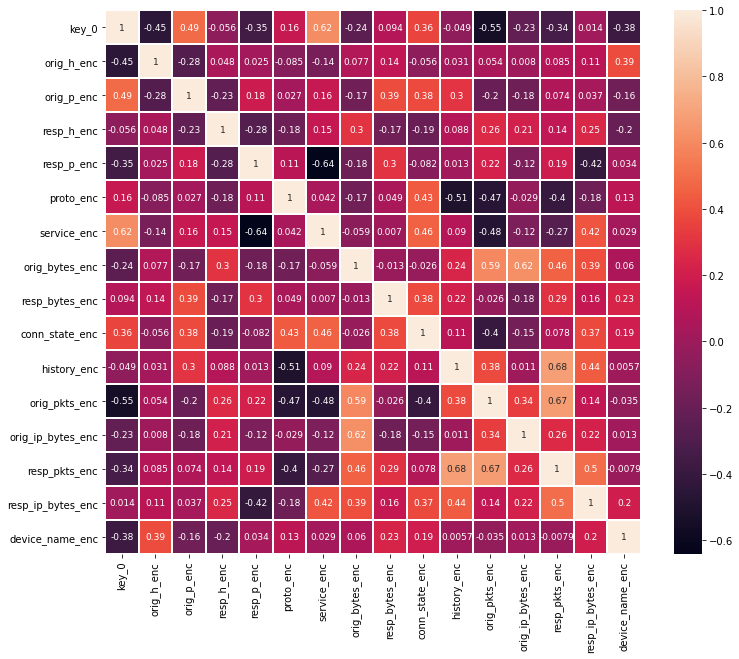

In [ ]:
correlmat = x_train.merge(y_train, on=x_train.index).corr()
plt.subplots(figsize=(12,10))
sns.heatmap(correlmat, linewidths=2, annot=True, annot_kws={"size": 9})

# Modelling

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
precision = []
accuracy = []
f1Score = []
algo = []

In [ ]:
# Fitting SVC to the Training Set
algo.append('SVC')
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
predicted = svc_model.predict(x_test)

In [ ]:
precision.append(precision_score(y_test, predicted, average='micro'))

In [ ]:
accuracy.append(accuracy_score(y_test, predicted, normalize=False))

In [ ]:
f1Score.append(f1_score(y_test, predicted, average='micro'))

In [ ]:
# Fitting RFC to the Training Set
algo.append('RFC')
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
predicted = rfc_model.predict(x_test)

In [ ]:
precision.append(precision_score(y_test, predicted, average='micro'))

accuracy.append(accuracy_score(y_test, predicted, normalize=False))

f1Score.append(f1_score(y_test, predicted, average='micro'))

In [ ]:
comparison = pd.DataFrame(list(zip(algo, precision, accuracy, f1Score)), columns = ['Algorithm', 'Precision', 'Accuracy', 'F1Score'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)


NameError: ignored

In [ ]:
comparison

,Algorithm,Precision,Accuracy,F1Score
0,SVC,0.791296,800,0.791296
1,RFC,0.896142,906,0.896142
